In [72]:
import geopandas as gpd
import pandas as pd
import time

from obia.handlers import open_geotiff
from obia.segment import segment
from obia.classify import classify

In [23]:
raster_path = "/mnt/c/tmp/output/output_179.tif"

image = open_geotiff(raster_path)
segmented_image = segment(
    image, segmentation_bands=[7,4,0],
    method="slic", n_segments=50000, compactness=0.01, max_num_iter=500, sigma=0, convert2lab=False, slic_zero=True,
    calc_skewness=False, calc_kurtosis=False, calc_homogeneity=False, calc_ASM=False
)

100%|██████████| 48975/48975 [5:29:35<00:00,  2.48it/s]  


In [24]:
segmented_image.write_segments(f'/mnt/c/tmp/output/output_179.gpkg')

In [25]:
raster_path = "/mnt/c/tmp/output/output_192.tif"

image = open_geotiff(raster_path)
segmented_image = segment(
    image, segmentation_bands=[7,4,0],
    method="slic", n_segments=50000, compactness=0.01, max_num_iter=500, sigma=0, convert2lab=False, slic_zero=True,
    calc_skewness=False, calc_kurtosis=False, calc_homogeneity=False, calc_ASM=False
)
segmented_image.write_segments(f'/mnt/c/tmp/output/output_192.gpkg')

100%|██████████| 49015/49015 [4:41:26<00:00,  2.90it/s]  


In [26]:
raster_path = "/mnt/c/tmp/output/output_196.tif"

image = open_geotiff(raster_path)
segmented_image = segment(
    image, segmentation_bands=[7,4,0],
    method="slic", n_segments=50000, compactness=0.01, max_num_iter=500, sigma=0, convert2lab=False, slic_zero=True,
    calc_skewness=False, calc_kurtosis=False, calc_homogeneity=False, calc_ASM=False
)
segmented_image.write_segments(f'/mnt/c/tmp/output/output_196.gpkg')

100%|██████████| 49011/49011 [3:58:24<00:00,  3.43it/s]  


In [31]:
from obia.utils import label_segments
import pandas as pd


In [36]:
training_points = gpd.read_file("/mnt/c/tmp/output/training_points.gpkg")

In [41]:
tile_numbers = [62, 80, 163, 179, 192, 196, 199, 208, 210]
tiles = []
for tile in tile_numbers:
    print(f"On tile {tile}")
    segments = gpd.read_file(f"/mnt/c/tmp/output/output_{tile}.gpkg")

    if tile == 208:
        droplist = ['_min', '_max', '_skewness', '_kurtosis', '_homogeneity', '_ASM']
        columns_to_drop = [col for col in segments.columns if any(substring in col for substring in droplist)] + ['nobs']
        segments = segments.drop(columns=columns_to_drop)
    
    labelled_segments, mixed_segments = label_segments(segments, training_points)
    print(f"mixed segments: {len(mixed_segments)}")
    print(f"labelled segments: {labelled_segments.shape}")
    tiles.append(labelled_segments)

training_segments = pd.concat(tiles, ignore_index=True)
print(training_segments.shape)
training_segments.head()

On tile 62
mixed segments: 0
labelled segments: (120, 51)
On tile 80
mixed segments: 0
labelled segments: (66, 51)
On tile 163
mixed segments: 0
labelled segments: (115, 51)
On tile 179
mixed segments: 0
labelled segments: (142, 51)
On tile 192
mixed segments: 0
labelled segments: (26, 51)
On tile 196
mixed segments: 0
labelled segments: (26, 51)
On tile 199
mixed segments: 0
labelled segments: (31, 51)
On tile 208
mixed segments: 0
labelled segments: (13, 51)
On tile 210
mixed segments: 0
labelled segments: (7, 51)
(546, 51)


,segment_id,feature_class,b0_mean,b0_variance,b0_contrast,b0_dissimilarity,b0_energy,b0_correlation,b1_mean,b1_variance,...,b6_dissimilarity,b6_energy,b6_correlation,b7_mean,b7_variance,b7_contrast,b7_dissimilarity,b7_energy,b7_correlation,geometry
0,8063,9,21.500000,58.284483,0.010942,0.000464,0.999976,0.276928,21.396552,74.377229,...,0.001805,0.999976,0.316557,78.586207,181.725327,0.127585,0.001620,0.999976,0.309708,"POLYGON ((195776.899 2190086.248, 195776.899 2..."
1,8481,9,15.708861,78.105111,0.008513,0.000438,0.999969,0.338272,14.772152,131.365807,...,0.001493,0.999969,0.412602,55.835443,143.377984,0.075897,0.001367,0.999969,0.412237,"POLYGON ((195803.227 2190078.110, 195803.227 2..."
2,10508,9,20.546512,67.666441,0.015077,0.000656,0.999966,0.285945,20.023256,97.138994,...,0.002344,0.999966,0.367274,80.337209,281.990941,0.181888,0.002230,0.999966,0.373599,"POLYGON ((195784.558 2190038.857, 195784.558 2..."
3,14269,9,26.906250,83.397461,0.026395,0.000896,0.999963,0.320558,29.187500,125.256510,...,0.002691,0.999963,0.366228,81.614583,236.299371,0.206929,0.002482,0.999963,0.376511,"POLYGON ((195744.826 2189965.616, 195744.826 2..."
4,23238,9,29.328571,101.792041,0.022693,0.000715,0.999972,0.327655,34.571429,143.473469,...,0.002330,0.999972,0.381357,95.500000,147.878571,0.197062,0.002090,0.999972,0.394013,"POLYGON ((195765.410 2189791.371, 195765.410 2..."


In [45]:
print(training_segments.dtypes)


segment_id             int64
feature_class         object
b0_mean              float64
b0_variance          float64
b0_contrast          float64
b0_dissimilarity     float64
b0_energy            float64
b0_correlation       float64
b1_mean              float64
b1_variance          float64
b1_contrast          float64
b1_dissimilarity     float64
b1_energy            float64
b1_correlation       float64
b2_mean              float64
b2_variance          float64
b2_contrast          float64
b2_dissimilarity     float64
b2_energy            float64
b2_correlation       float64
b3_mean              float64
b3_variance          float64
b3_contrast          float64
b3_dissimilarity     float64
b3_energy            float64
b3_correlation       float64
b4_mean              float64
b4_variance          float64
b4_contrast          float64
b4_dissimilarity     float64
b4_energy            float64
b4_correlation       float64
b5_mean              float64
b5_variance          float64
b5_contrast   

In [47]:
import numpy as np

def convert_int(x):
    if isinstance(x, np.int64):
        return int(x)
    return x

training_segments = training_segments.applymap(convert_int)

# training_segments.to_file("/mnt/c/tmp/output/training_segments.gpkg")

/tmp/ipykernel_975939/2145670190.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  training_segments = training_segments.applymap(convert_int)


In [96]:
training_segments = gpd.read_file("/mnt/c/tmp/output/training_segments_2.gpkg")

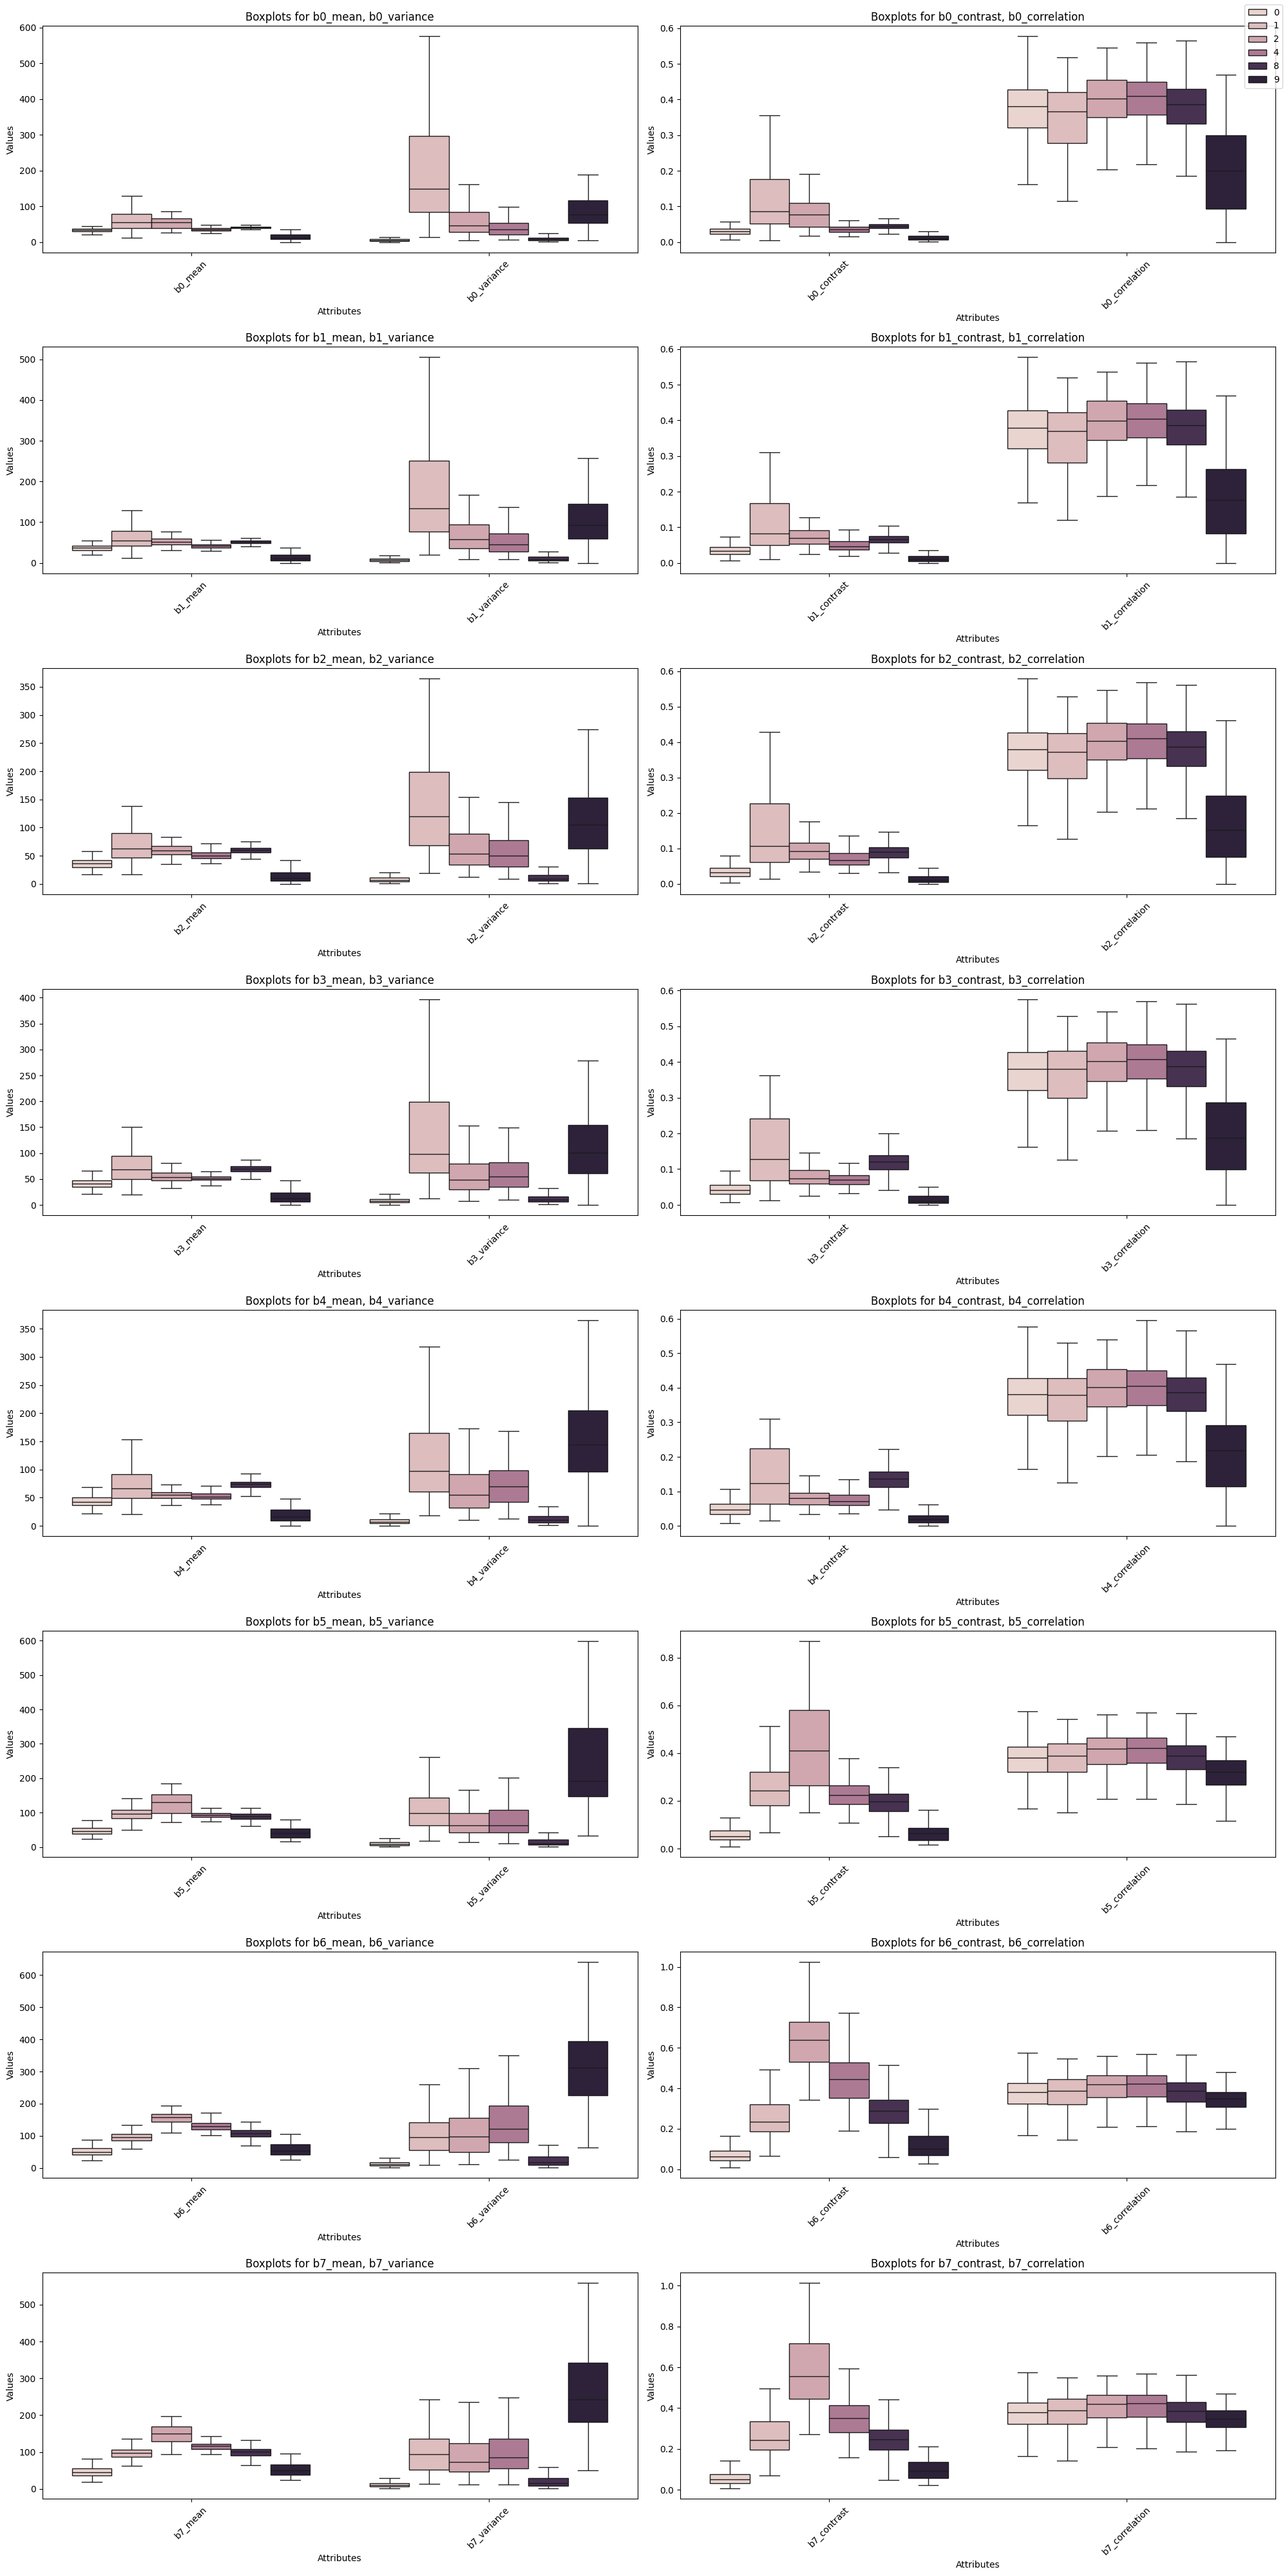

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define base column groups
base_group1 = ['_mean', '_variance']
base_group2 = ['_contrast', '_correlation']

# Create a 8-row 2-column subplot
fig, axes = plt.subplots(8, 2, figsize=(20, 40))

# Iterate over each band
for i in range(8):
    # Create group name for the current band
    group1 = [f'b{i}{suffix}' for suffix in base_group1]
    group2 = [f'b{i}{suffix}' for suffix in base_group2]
    group1.append('feature_class')
    group2.append('feature_class')

    # Melt the dataframe for each group
    melted_df1 = pd.melt(training_segments[group1], id_vars='feature_class',
                         var_name='Attributes', value_name='Values')
    melted_df2 = pd.melt(training_segments[group2], id_vars='feature_class',
                         var_name='Attributes', value_name='Values')

    # Create boxplots for the current band
    sns.boxplot(ax=axes[i, 0], data=melted_df1, x='Attributes',
                y='Values', hue='feature_class', showfliers=False)
    sns.boxplot(ax=axes[i, 1], data=melted_df2, x='Attributes',
                y='Values', hue='feature_class', showfliers=False)

    # Rotate x-axis labels for better visibility
    for ax in axes[i]:
        ax.tick_params(axis='x', rotation=45)
        ax.legend_.remove()

    # Set titles
    axes[i, 0].title.set_text(f'Boxplots for b{i}_mean, b{i}_variance')
    axes[i, 1].title.set_text(f'Boxplots for b{i}_contrast, b{i}_correlation')

# Add legend 
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('boxplot.png', dpi=300)
plt.show()


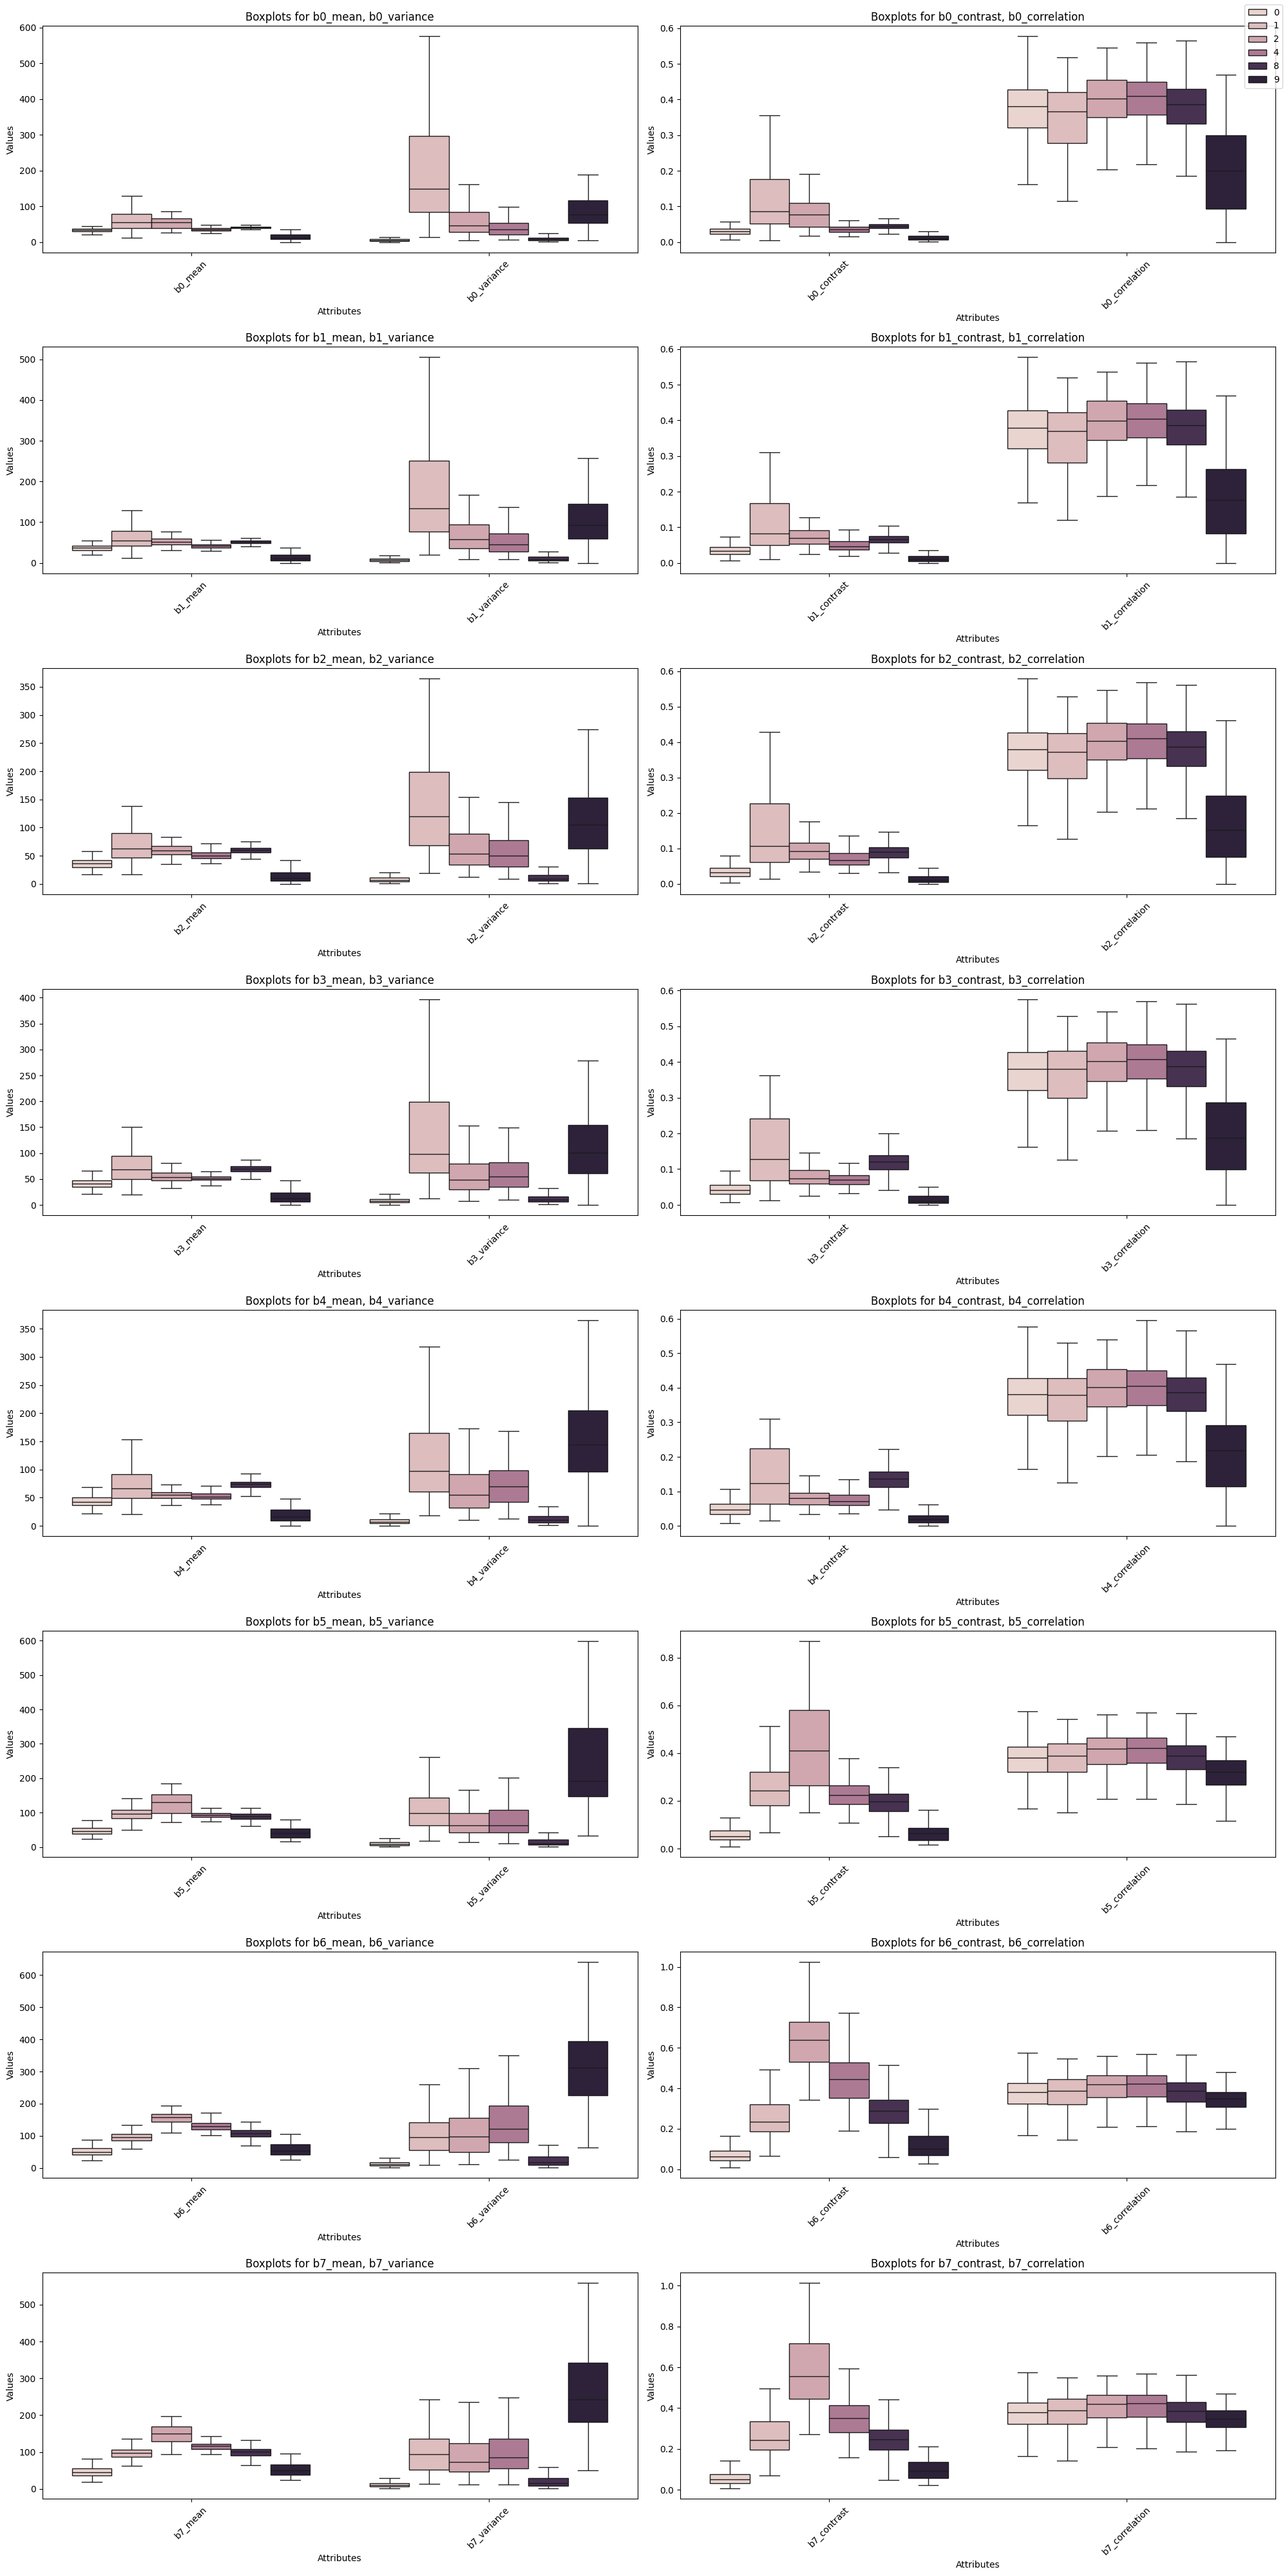

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define base column groups
base_group1 = ['_mean', '_variance']
base_group2 = ['_contrast', '_correlation']

# Create a 8-row 2-column subplot
fig, axes = plt.subplots(8, 2, figsize=(20, 40))

# Iterate over each band
for i in range(8):
    # Create group name for the current band
    group1 = [f'b{i}{suffix}' for suffix in base_group1]
    group2 = [f'b{i}{suffix}' for suffix in base_group2]
    group1.append('feature_class')
    group2.append('feature_class')

    # Melt the dataframe for each group
    melted_df1 = pd.melt(training_segments[group1], id_vars='feature_class',
                         var_name='Attributes', value_name='Values')
    melted_df2 = pd.melt(training_segments[group2], id_vars='feature_class',
                         var_name='Attributes', value_name='Values')

    # Create boxplots for the current band
    sns.boxplot(ax=axes[i, 0], data=melted_df1, x='Attributes',
                y='Values', hue='feature_class', showfliers=False)
    sns.boxplot(ax=axes[i, 1], data=melted_df2, x='Attributes',
                y='Values', hue='feature_class', showfliers=False)

    # Rotate x-axis labels for better visibility
    for ax in axes[i]:
        ax.tick_params(axis='x', rotation=45)
        ax.legend_.remove()

    # Set titles
    axes[i, 0].title.set_text(f'Boxplots for b{i}_mean, b{i}_variance')
    axes[i, 1].title.set_text(f'Boxplots for b{i}_contrast, b{i}_correlation')

# Add legend 
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [92]:
variables = []
for i in range(8):
    for stat in ['mean', 'variance', 'contrast', 'correlation']:
        variables.append(f'b{i}_{stat}')

p_values = {}
for var in variables:
    feature_class_groups = training_segments.groupby('feature_class')[var].apply(list)
    _, p_val = stats.kruskal(*feature_class_groups)
    p_values[var] = p_val if p_val > 0.001 else '***'

p_values_df = pd.Series(p_values, name='p_value').reset_index().rename(columns={'index': 'variable'})
print(p_values_df)


          variable p_value
0          b0_mean     ***
1      b0_variance     ***
2      b0_contrast     ***
3   b0_correlation     ***
4          b1_mean     ***
5      b1_variance     ***
6      b1_contrast     ***
7   b1_correlation     ***
8          b2_mean     ***
9      b2_variance     ***
10     b2_contrast     ***
11  b2_correlation     ***
12         b3_mean     ***
13     b3_variance     ***
14     b3_contrast     ***
15  b3_correlation     ***
16         b4_mean     ***
17     b4_variance     ***
18     b4_contrast     ***
19  b4_correlation     ***
20         b5_mean     ***
21     b5_variance     ***
22     b5_contrast     ***
23  b5_correlation     ***
24         b6_mean     ***
25     b6_variance     ***
26     b6_contrast     ***
27  b6_correlation     ***
28         b7_mean     ***
29     b7_variance     ***
30     b7_contrast     ***
31  b7_correlation     ***


In [84]:
training_segments['feature_class'].unique()

array([ 9,  4,  2,  1, 11,  8,  0])

In [103]:
columns_to_keep = [
    'segment_id', 
    'feature_class',
    'b7_mean', 
    'b7_variance', 
    'b7_contrast',
    'b7_correlation',
    'geometry'
    ]

training = training_segments[columns_to_keep]
training['feature_class'] = training['feature_class'].astype(int)
training['feature_class'].value_counts()

/home/milo/miniconda3/envs/gdal_env/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


feature_class
8    2947
0    1704
2     152
4     145
1     138
9     102
Name: count, dtype: int64

In [73]:
raster_path = "/mnt/c/tmp/output/output_62.tif"
image = open_geotiff(raster_path)
segmented_image = segment(
    image, segmentation_bands=[7,4,1], statistics_bands=[7, 4, 1],
    method="slic", n_segments=50000, compactness=0.01, max_num_iter=500, sigma=0, convert2lab=False, slic_zero=True,
    calc_skewness=False, calc_kurtosis=False, calc_homogeneity=False, calc_ASM=False, calc_dissimilarity=False, calc_energy=False
)

100%|██████████| 49119/49119 [5:01:40<00:00,  2.71it/s]  


In [104]:
columns_to_drop = [col for col in segmented_image.segments.columns if col not in training.columns]
segments_old = segmented_image.segments.copy()
# Drop these columns from 'segmented_image.segments'
segmented_image.segments = segmented_image.segments.drop(columns=columns_to_drop)

print(segmented_image.segments.columns)

Index(['segment_id', 'feature_class', 'b7_mean', 'b7_variance', 'b7_contrast',
       'b7_correlation', 'geometry'],
      dtype='object')


In [105]:
classified = classify(image, segmented_image, training, method='mlp', compute_shap=False, hidden_layer_sizes=(50, 50 ), solver='adam', max_iter=10000)

In [80]:
classified_rf = classify(image, segmented_image, training, method='rf', compute_shap=False)

In [78]:
import geopandas as gpd
import rasterio
from rasterio.features import shapes
import numpy as np


def raster_to_vector(raster, value, transform):
    """
    Convert a raster into a vector (Polygon).

    Args:
        raster(numpy.array): A 2D numpy array representing the raster.
        value(int): Value of pixels to be used for generating polygons.
        transform (Affine): A rasterio.Affine class instance representing the transformation matrix.

    Returns:
        Geopandas GeoDataFrame representation.
    """
    mask = None if value is None else (raster == value)
    shapes_gen = shapes(raster, mask=mask, transform=transform)
    poly_dict_list = []
    for poly_dict, val in shapes_gen:
        new_dict = {'properties': {'value': val}, 'geometry': poly_dict}
        poly_dict_list.append(new_dict)
    vector_df = gpd.GeoDataFrame.from_features(poly_dict_list)
    return vector_df




def write_vector_to_geopackage(vector, filepath):
    """
    Write a vector into a geopackage file (.gpkg).

    Args:
        vector(GeoDataFrame): The vector data in GeoDataFrame format.
        filepath(str): The file path where the results should be written.
    """
    vector.to_file(filepath, driver='GPKG')



In [106]:
vector = raster_to_vector(classified.classified_image.astype(np.int16), None, image.transform)

write_vector_to_geopackage(vector, "/mnt/c/tmp/output/classified_62_mlp.gpkg")

In [81]:
vector_rf = raster_to_vector(classified_rf.classified_image.astype(np.int16), None, image.transform)

write_vector_to_geopackage(vector_rf, "/mnt/c/tmp/output/classified_62_rf.gpkg")